# CIFAR - 10
## Improved CNN

### Activate virtual environment

In [1]:
%%bash
source ~/kerai/bin/activate

### Imports

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Import helper functions

In [3]:
from helper import get_class_names, get_train_data, get_test_data, plot_images
from helper import plot_model, predict_classes, visualize_errors

Change matplotlib graph style

In [4]:
matplotlib.style.use('ggplot')

### Constants

Import class names

In [5]:
class_names = get_class_names()
print(class_names)

Decoding file: data/batches.meta
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Get number of classes

In [6]:
num_classes = len(class_names)
print(num_classes)

10


### Fetch and decode data

Load the training dataset. Labels are integers whereas class is one-hot encoded vectors.

In [7]:
images_train, labels_train, class_train = get_train_data()

Decoding file: data/data_batch_1
Decoding file: data/data_batch_2
Decoding file: data/data_batch_3
Decoding file: data/data_batch_4
Decoding file: data/data_batch_5


Load the testing dataset.

In [8]:
images_test, labels_test, class_test = get_test_data()

Decoding file: data/test_batch


In [9]:
print("Training set size:\t",len(images_train))
print("Testing set size:\t",len(images_test))

Training set size:	 50000
Testing set size:	 10000


The CIFAR-10 dataset has been loaded and consists of a total of 60,000 images and corresponding labels.

### Define the CNN model

In [45]:
def cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))    
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    
    return model

Build model

In [46]:
model = cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
__________

### Improving accuracy

 - Data augmentation

In [47]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(images_train)

In [33]:
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(images_train)

### Train model on the training data

Save the model after every epoch

In [48]:
checkpoint = ModelCheckpoint('best_model.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor 

Configure the model for training

In [49]:
model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=1.0e-4), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

For more information on categorical cross entropy loss function see - https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/

Fit the model on the data provided

In [30]:
model_details = model.fit(images_train, class_train,
                    batch_size = 128,
                    epochs = 20, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 6144/50000 [==>...........................] - ETA: 69s - loss: 2.2925 - acc: 0.1191 ETA: 72s - lo

KeyboardInterrupt: 

In [50]:
model_details = model.fit_generator(datagen.flow(images_train, class_train, batch_size = 32),
                    steps_per_epoch = len(images_train) / 32, # number of samples per gradient update
                    epochs = 20, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Epoch 1/20
1563/1562 [==============================] - 110s - loss: 2.0091 - acc: 0.2515 - val_loss: 1.7678 - val_acc: 0.3813
Epoch 2/20
1563/1562 [==============================] - 113s - loss: 1.8510 - acc: 0.3232 - val_loss: 1.6579 - val_acc: 0.4062
Epoch 3/20
1563/1562 [==============================] - 114s - loss: 1.7707 - acc: 0.3545 - val_loss: 1.5723 - val_acc: 0.4458
Epoch 4/20
1563/1562 [==============================] - 113s - loss: 1.7080 - acc: 0.3840 - val_loss: 1.4777 - val_acc: 0.4770
Epoch 5/20
1563/1562 [==============================] - 115s - loss: 1.6524 - acc: 0.4012 - val_loss: 1.4468 - val_acc: 0.4882
Epoch 6/20
1563/1562 [==============================] - 116s - loss: 1.6138 - acc: 0.4170 - val_loss: 1.3894 - val_acc: 0.5080
Epoch 7/20
1563/1562 [==============================] - 116s - loss: 1.5813 - acc: 0.4302 - val_loss: 1.3583 - val_acc: 0.5222
Epoch 8/20
1563/1562 [==============================] - 116s - loss: 1.5533 - acc: 0.4391 - val_loss: 1.3541 - 

In [51]:
model_details = model.fit_generator(datagen.flow(images_train, class_train, batch_size = 32),
                    steps_per_epoch = len(images_train) / 32, # number of samples per gradient update
                    epochs = 30, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Epoch 1/30
1563/1562 [==============================] - 113s - loss: 1.3642 - acc: 0.5141 - val_loss: 1.1393 - val_acc: 0.5940
Epoch 2/30
1563/1562 [==============================] - 114s - loss: 1.3515 - acc: 0.5141 - val_loss: 1.1461 - val_acc: 0.5924
Epoch 3/30
1563/1562 [==============================] - 115s - loss: 1.3443 - acc: 0.5200 - val_loss: 1.1351 - val_acc: 0.5979
Epoch 4/30
1563/1562 [==============================] - 115s - loss: 1.3359 - acc: 0.5208 - val_loss: 1.1275 - val_acc: 0.5964
Epoch 5/30
1563/1562 [==============================] - 116s - loss: 1.3240 - acc: 0.5263 - val_loss: 1.1396 - val_acc: 0.5890
Epoch 6/30
1563/1562 [==============================] - 117s - loss: 1.3181 - acc: 0.5288 - val_loss: 1.0983 - val_acc: 0.6091
Epoch 7/30
1563/1562 [==============================] - 116s - loss: 1.3032 - acc: 0.5349 - val_loss: 1.0949 - val_acc: 0.6122
Epoch 8/30
1563/1562 [==============================] - 116s - loss: 1.3031 - acc: 0.5317 - val_loss: 1.0853 - 

KeyboardInterrupt: 

### Evaluate the model

In [21]:
scores = model.evaluate(images_test, class_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.90%


### Model accuracy and loss plots

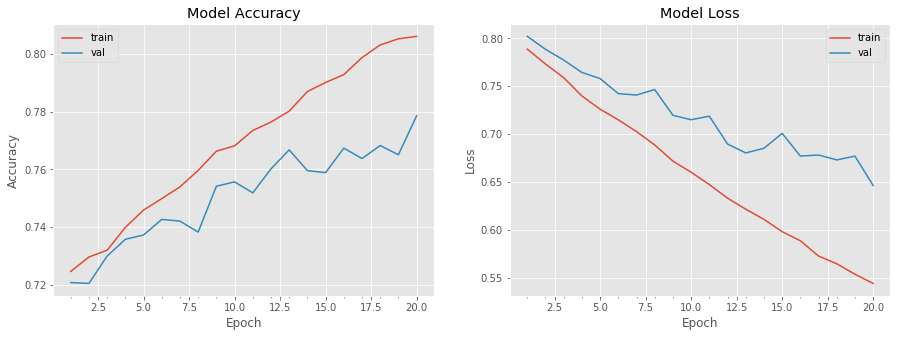

In [22]:
plot_model(model_details)

A pure CNN model from https://arxiv.org/pdf/1412.6806.pdf

In [31]:
def pure_cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', input_shape=(32,32,3)))    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same'))  
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', strides = 2))    
    model.add(Dropout(0.5))
    
    
    model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same'))    
    model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same'))
    model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same', strides = 2))    
    model.add(Dropout(0.5))
    
    #model.add(Flatten())
    
    #model.add(Dense(512, activation='relu'))
    #model.add(Dropout(0.5))
    
    #model.add(Dense(num_classes, activation='softmax'))
    
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding='valid'))

    model.add(GlobalAveragePooling2D())
    
    model.add(Activation('softmax'))

    model.summary()
    
    return model

### Predictions

Predict class for test set images

In [23]:
correct, labels_pred = predict_classes(model, images_test, labels_test)

Calculate accuracy using manual calculation

In [24]:
num_images = len(correct)
print("Accuracy: %.2f%%" % ((sum(correct)*100)/num_images))

Accuracy: 79.90%


### Show some mis-classifications

Plot the first 9 mis-classified images

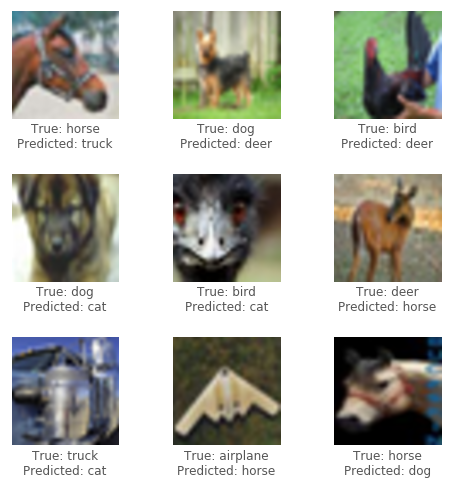

In [25]:
visualize_errors(images_test, labels_test, class_names, labels_pred, correct)

## Credits

 - https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
 - https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/06_CIFAR-10.ipynb
 - http://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/
 - https://parneetk.github.io/blog/cnn-cifar10/
 - https://github.com/dnlcrl/deep-residual-networks-pyfunt/blob/master/docs/CIFAR-10%20Experiments.ipynb